In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
import pingouin as pg

CI_df = pd.read_csv(r'C:\Users\Ping\Documents\MATLAB\Xblaster3_Chamber3_GIT\XPL_code\Paper_code_and_spreadsheets\CSV\CImax.csv')
CI_df.head
CI_df.isnull().sum()
CI_df2 = CI_df.loc[CI_df['CI'].notna(),:]

CI_df.groupby(['Group_crit']).mean()

stats.f_oneway(CI_df2['CI'][CI_df2['Group_crit']=='RS'],
               CI_df2['CI'][CI_df2['Group_crit']=='FS'],
               CI_df2['CI'][CI_df2['Group_crit']=='Burster_h'],
               CI_df2['CI'][CI_df2['Group_crit']=='Burster_l'])

# Result is same in MATLAB
# But one-way ANOVA assumes that the data come from populations that are Gaussian and have equal variances

F_onewayResult(statistic=29.791828892133065, pvalue=1.4586902354694243e-15)

In [3]:
CI_df3 = CI_df2[CI_df2['Group_crit'].isin(['RS','FS','Burster_h','Burster_l'])]
comp = mc.MultiComparison(CI_df3.CI,CI_df3.Group_crit)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Burster_h,Burster_l,-40.7034,0.001,-57.2875,-24.1194,True
Burster_h,FS,-53.9577,0.001,-69.6087,-38.3066,True
Burster_h,RS,-48.9697,0.001,-63.4698,-34.4696,True
Burster_l,FS,-13.2542,0.0437,-26.2497,-0.2587,True
Burster_l,RS,-8.2662,0.2532,-19.8499,3.3174,False
FS,RS,4.988,0.5745,-5.2152,15.1912,False


In [4]:
CI_df.groupby(['Group_crit']).mean()

,CI
Group_crit,
Burster_h,57.650461
Burster_l,16.947021
FS,3.692802
Insufficient spikes,14.221948
Prestim burster1,42.741099
Prestim burster2,14.455750
RS,8.680793
Unclassified,7.954710


In [5]:
stats.f_oneway(CI_df2['CI'][CI_df2['Group_crit']=='RS'],
               CI_df2['CI'][CI_df2['Group_crit']=='FS'],
               CI_df2['CI'][CI_df2['Group_crit']=='Prestim burster1'],
               CI_df2['CI'][CI_df2['Group_crit']=='Prestim burster2'])

F_onewayResult(statistic=20.43868618040489, pvalue=1.8124282142678744e-11)

In [6]:
CI_df4 = CI_df2[CI_df2['Group_crit'].isin(['RS','FS','Prestim burster1','Prestim burster2'])]
comp = mc.MultiComparison(CI_df4.CI,CI_df4.Group_crit)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
FS,Prestim burster1,39.0483,0.001,25.4498,52.6468,True
FS,Prestim burster2,10.7629,0.0642,-0.4234,21.9493,False
FS,RS,4.988,0.5129,-4.3959,14.3719,False
Prestim burster1,Prestim burster2,-28.2853,0.001,-42.165,-14.4057,True
Prestim burster1,RS,-34.0603,0.001,-46.533,-21.5876,True
Prestim burster2,RS,-5.775,0.4231,-15.5618,4.0119,False


In [7]:
len(CI_df2[CI_df2['Group_crit']=='Prestim burster1'])

20

In [8]:
len(CI_df2[CI_df2['Group_crit']=='Prestim burster2'])

38

In [9]:
stats.f_oneway(CI_df2['CI'][CI_df2['Group_gmm']=='RS'],
               CI_df2['CI'][CI_df2['Group_gmm']=='FS'],
               CI_df2['CI'][CI_df2['Group_gmm']=='Burster'])

F_onewayResult(statistic=27.36935565936908, pvalue=2.9158213222927206e-11)

In [10]:
CI_df5 = CI_df2[CI_df2['Group_gmm'].isin(['RS','FS','Burster'])]
comp = mc.MultiComparison(CI_df5.CI,CI_df5.Group_gmm)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Burster,FS,-28.0487,0.001,-37.4511,-18.6463,True
Burster,RS,-22.6019,0.001,-31.5582,-13.6456,True
FS,RS,5.4468,0.2766,-2.924,13.8176,False


array([[<AxesSubplot:title={'center':'Burster'}>,
        <AxesSubplot:title={'center':'FS'}>],
       [<AxesSubplot:title={'center':'Prestim burster'}>,
        <AxesSubplot:title={'center':'RS'}>],
       [<AxesSubplot:title={'center':'Unclassified'}>, <AxesSubplot:>]],
      dtype=object)

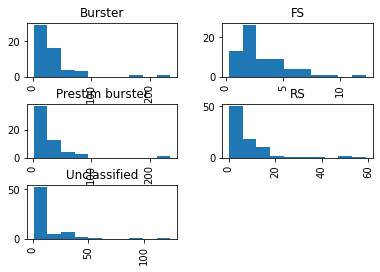

In [11]:
CI_df2['CI'].hist(by=CI_df2['Group_gmm'])

In [12]:
# Check for equality of variances
# Bartlett test is sensitive to departures from normality
stats.levene(CI_df2['CI'][CI_df2['Group_crit']=='RS'],
               CI_df2['CI'][CI_df2['Group_crit']=='FS'],
               CI_df2['CI'][CI_df2['Group_crit']=='Burster_h'],
               CI_df2['CI'][CI_df2['Group_crit']=='Burster_l'], center='median')

LeveneResult(statistic=11.428233211333628, pvalue=7.164959748586065e-07)

In [13]:
CI_df2.loc[:,'logCI'] = np.log2(CI_df2['CI'])

C:\Users\Ping\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ping\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


array([[<AxesSubplot:title={'center':'Burster'}>,
        <AxesSubplot:title={'center':'FS'}>],
       [<AxesSubplot:title={'center':'Prestim burster'}>,
        <AxesSubplot:title={'center':'RS'}>],
       [<AxesSubplot:title={'center':'Unclassified'}>, <AxesSubplot:>]],
      dtype=object)

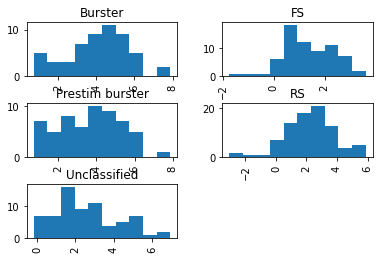

In [14]:
CI_df2['logCI'].hist(by=CI_df2['Group_gmm'])

In [15]:
stats.levene(CI_df2['logCI'][CI_df2['Group_gmm']=='RS'],
             CI_df2['logCI'][CI_df2['Group_gmm']=='FS'],
             CI_df2['logCI'][CI_df2['Group_gmm']=='Burster'])
# Even after log transforming, Levene's test fails, just by less

LeveneResult(statistic=6.758435813562414, pvalue=0.001437344549876343)

In [16]:
CI_df2.groupby('Group_gmm').count()

,Group_crit,CI,logCI
Group_gmm,,,
Burster,54,54,54
FS,68,68,68
Prestim burster,58,58,58
RS,86,86,86
Unclassified,69,69,69


In [104]:
86/54
# ANOVA is Analysis of variance is reasonably robust to violations of this assumption, provided the size of your groups is reasonably similar (e.g. largest/smallest = 1.5; Stevens 1996, p. 249)"
# Is the failure after log transforming due to the Burster population containing two subpopulations?
# Try again on groups from Criteria

1.5925925925925926

In [17]:
stats.levene(CI_df2['logCI'][CI_df2['Group_crit']=='RS'],
             CI_df2['logCI'][CI_df2['Group_crit']=='FS'],
             CI_df2['logCI'][CI_df2['Group_crit']=='Burster_h'],
             CI_df2['logCI'][CI_df2['Group_crit']=='Burster_l'])
# Closer to homoscedastic but still not!

LeveneResult(statistic=2.899685952066238, pvalue=0.03655549218337195)

In [6]:
# Rerun ANOVA on log(CI)
stats.f_oneway(CI_df2['logCI'][CI_df2['Group_crit']=='RS'],
               CI_df2['logCI'][CI_df2['Group_crit']=='FS'],
               CI_df2['logCI'][CI_df2['Group_crit']=='Burster_h'],
               CI_df2['logCI'][CI_df2['Group_crit']=='Burster_l'])

KeyError: 'logCI'

In [18]:
# Welch's ANOVA is more robust to unequal variances
pg.welch_anova(dv = 'CI', between = 'Group_crit', data = CI_df3)

,Source,ddof1,ddof2,F,p-unc,np2
0,Group_crit,3,48.87127,12.528097,0.000003,0.341943


In [19]:
pg.pairwise_gameshowell(dv ='CI', between ='Group_crit', data = CI_df3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Burster_h,Burster_l,57.650461,16.947021,40.703440,14.764514,2.756843,17.464812,0.058284,0.822878
1,Burster_h,FS,57.650461,3.692802,53.957660,14.463754,3.730543,16.102844,0.008795,1.054901
2,Burster_h,RS,57.650461,8.680793,48.969668,14.488339,3.379937,16.212540,0.017781,0.890448
3,Burster_l,FS,16.947021,3.692802,13.254219,3.182726,4.164424,33.135487,0.001147,0.980151
4,Burster_l,RS,16.947021,8.680793,8.266228,3.292650,2.510509,37.812088,0.074499,0.528820
5,FS,RS,3.692802,8.680793,-4.987991,1.432081,-3.483037,126.989654,0.003760,-0.646684


In [20]:
CI_df3 = CI_df2[CI_df2['Group_crit'].isin(['RS','FS','Burster_h','Burster_l'])]
comp = mc.MultiComparison(CI_df3.logCI,CI_df3.Group_crit)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Burster_h,Burster_l,-1.9571,0.001,-3.1299,-0.7842,True
Burster_h,FS,-4.0626,0.001,-5.1695,-2.9558,True
Burster_h,RS,-3.1443,0.001,-4.1698,-2.1188,True
Burster_l,FS,-2.1056,0.001,-3.0246,-1.1865,True
Burster_l,RS,-1.1873,0.0013,-2.0065,-0.368,True
FS,RS,0.9183,0.0064,0.1967,1.6399,True


In [21]:
# In case of very small p-values, the convention is to write it as p<0.001.
CI_df4 = CI_df2[CI_df2['Group_crit'].isin(['RS','FS','Prestim burster1','Prestim burster2'])]
pg.welch_anova(dv = 'CI', between = 'Group_crit', data = CI_df4)
pg.pairwise_gameshowell(dv ='CI', between ='Group_crit', data = CI_df4)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,FS,Prestim burster1,3.692802,42.741099,-39.048297,11.376452,-3.432379,19.197881,0.013462,-0.917532
1,FS,Prestim burster2,3.692802,14.455750,-10.762949,2.587911,-4.158933,45.184862,0.001000,-0.917154
2,FS,RS,3.692802,8.680793,-4.987991,1.432081,-3.483037,126.989654,0.003760,-0.646684
3,Prestim burster1,Prestim burster2,42.741099,14.455750,28.285348,11.609560,2.436384,20.797245,0.100954,0.664004
4,Prestim burster1,RS,42.741099,8.680793,34.060306,11.407693,2.985731,19.409368,0.034592,0.735849
5,Prestim burster2,RS,14.455750,8.680793,5.774957,2.721964,2.121614,54.651693,0.159244,0.410726


In [22]:
CI_df5 = CI_df2[CI_df2['Group_gmm'].isin(['RS','FS','Burster'])]
pg.welch_anova(dv = 'CI', between = 'Group_gmm', data = CI_df5)
pg.pairwise_gameshowell(dv ='CI', between ='Group_gmm', data = CI_df5)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Burster,FS,31.205755,3.157055,28.048700,5.528818,5.073182,53.254543,0.001,0.918926
1,Burster,RS,31.205755,8.603827,22.601928,5.647653,4.002004,57.906859,0.001,0.691074
2,FS,RS,3.157055,8.603827,-5.446772,1.214322,-4.485445,93.788385,0.001,-0.724287


In [23]:
CI_df4.loc[:, 'Group_crit'] = CI_df4.Group_crit.replace(['Prestim burster1','Prestim burster2'],'Prestim burster')
CI_df4.Group_crit.unique()


C:\Users\Ping\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


array(['RS', 'FS', 'Prestim burster'], dtype=object)

In [24]:
pg.welch_anova(dv = 'CI', between = 'Group_crit', data = CI_df4)
pg.pairwise_gameshowell(dv ='CI', between ='Group_crit', data = CI_df4)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,FS,Prestim burster,3.692802,24.209319,-20.516517,4.604721,-4.455540,60.690106,0.001000,-0.889819
1,FS,RS,3.692802,8.680793,-4.987991,1.432081,-3.483037,126.989654,0.001958,-0.646684
2,Prestim burster,RS,24.209319,8.680793,15.528526,4.681373,3.317088,64.730359,0.004209,0.560623


In [25]:
AI_df = pd.read_csv(r'C:\Users\Ping\Documents\MATLAB\Xblaster3_Chamber3_GIT\XPL_code\Paper_code_and_spreadsheets\CSV\adaptindex.csv')
AI_df2 = AI_df.loc[AI_df['Adaptindex'].notna(),:]
AI_df2.head

<bound method NDFrame.head of                Group_crit     Group_gmm  Adaptindex
3     Insufficient spikes  Unclassified   -1.000000
6                      RS            RS    0.261538
11           Unclassified            FS    0.261538
15                     RS            RS    0.250000
16              Burster_l       Burster    0.250000
...                   ...           ...         ...
1043         Unclassified  Unclassified    1.000000
1045  Insufficient spikes  Unclassified    1.000000
1046  Insufficient spikes  Unclassified    0.250000
1051            Burster_h       Burster    1.000000
1053            Burster_h       Burster    0.666667

[392 rows x 3 columns]>

In [27]:
stats.levene(AI_df2['Adaptindex'][AI_df2['Group_crit']=='RS'],
               AI_df2['Adaptindex'][AI_df2['Group_crit']=='FS'],
               AI_df2['Adaptindex'][AI_df2['Group_crit']=='Burster_h'],
               AI_df2['Adaptindex'][AI_df2['Group_crit']=='Burster_l'], center='median')

LeveneResult(statistic=4.336072191656655, pvalue=0.005246575853561317)

In [14]:
AI_df3 = AI_df2[AI_df2['Group_crit'].isin(['RS','FS','Burster_h','Burster_l'])]
pg.welch_anova(dv = 'Adaptindex', between = 'Group_crit', data = AI_df3)


,Source,ddof1,ddof2,F,p-unc,np2
0,Group_crit,3,76.636579,9.174567,0.000029,0.080373


In [15]:
pg.pairwise_gameshowell(dv ='Adaptindex', between ='Group_crit', data = AI_df3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Burster_h,Burster_l,0.619390,0.463778,0.155612,0.110555,1.407554,38.761217,0.502179,0.361931
1,Burster_h,FS,0.619390,0.183987,0.435403,0.101282,4.298907,29.216737,0.001000,1.041951
2,Burster_h,RS,0.619390,0.277301,0.342089,0.101004,3.386886,29.063158,0.010422,0.771735
3,Burster_l,FS,0.463778,0.183987,0.279791,0.071954,3.888448,81.923511,0.001152,0.738026
4,Burster_l,RS,0.463778,0.277301,0.186477,0.071562,2.605801,85.536710,0.051856,0.443238
5,FS,RS,0.183987,0.277301,-0.093314,0.056186,-1.660823,183.822788,0.347886,-0.241134


In [35]:
maxVS_df = pd.read_csv(r'C:\Users\Ping\Documents\MATLAB\Xblaster3_Chamber3_GIT\XPL_code\Paper_code_and_spreadsheets\CSV\maxVS.csv')
maxVS_df2 = maxVS_df.loc[maxVS_df['maxVS'].notna(),:]
stats.levene(maxVS_df2['maxVS'][maxVS_df2['Group_crit']=='RS'],
               maxVS_df2['maxVS'][maxVS_df2['Group_crit']=='FS'],
               maxVS_df2['maxVS'][maxVS_df2['Group_crit']=='Burster_h'],
               maxVS_df2['maxVS'][maxVS_df2['Group_crit']=='Burster_l'], center='median')

LeveneResult(statistic=4.192113017690524, pvalue=0.006897514614816967)

In [36]:
maxVS_df3 = maxVS_df2[maxVS_df2['Group_crit'].isin(['RS','FS','Burster_h','Burster_l'])]
pg.welch_anova(dv = 'maxVS', between = 'Group_crit', data = maxVS_df3)

,Source,ddof1,ddof2,F,p-unc,np2
0,Group_crit,3,41.964732,11.264256,0.000015,0.15105


In [37]:
pg.pairwise_gameshowell(dv ='maxVS', between ='Group_crit', data = maxVS_df3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Burster_h,Burster_l,0.811685,0.552860,0.258824,0.097977,2.641681,28.606327,0.060251,0.902963
1,Burster_h,FS,0.811685,0.367226,0.444459,0.079848,5.566292,17.178078,0.001000,1.721646
2,Burster_h,RS,0.811685,0.406349,0.405336,0.080853,5.013257,18.108575,0.001000,1.483394
3,Burster_l,FS,0.552860,0.367226,0.185634,0.073310,2.532198,31.907384,0.073952,0.646777
4,Burster_l,RS,0.552860,0.406349,0.146512,0.074402,1.969176,34.097200,0.219585,0.468756
5,FS,RS,0.367226,0.406349,-0.039123,0.048083,-0.813658,122.074421,0.828905,-0.147662


In [39]:
maxsync_df = pd.read_csv(r'C:\Users\Ping\Documents\MATLAB\Xblaster3_Chamber3_GIT\XPL_code\Paper_code_and_spreadsheets\CSV\maxsync.csv')
maxsync_df2 = maxsync_df.loc[maxsync_df['msf'].notna(),:]
stats.levene(maxsync_df2['msf'][maxsync_df2['Group_crit']=='RS'],
               maxsync_df2['msf'][maxsync_df2['Group_crit']=='FS'],
               maxsync_df2['msf'][maxsync_df2['Group_crit']=='Burster_h'],
               maxsync_df2['msf'][maxsync_df2['Group_crit']=='Burster_l'], center='median')

LeveneResult(statistic=5.848422036382487, pvalue=0.0009128789073850799)

In [25]:
maxsync_df3 = maxsync_df2[maxsync_df2['Group_crit'].isin(['RS','FS','Burster_h','Burster_l'])]
pg.welch_anova(dv = 'msf', between = 'Group_crit', data = maxsync_df3)

,Source,ddof1,ddof2,F,p-unc,np2
0,Group_crit,3,30.39362,7.821305,0.000518,0.175838


In [26]:
pg.pairwise_gameshowell(dv ='msf', between ='Group_crit', data = maxsync_df3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Burster_h,Burster_l,84.741697,26.327531,58.414166,18.960162,3.080890,14.765816,0.034734,1.117148
1,Burster_h,FS,84.741697,55.801021,28.940676,21.677582,1.335051,23.776507,0.546203,0.433937
2,Burster_h,RS,84.741697,16.841055,67.900642,17.655476,3.845869,11.307598,0.011857,1.207768
3,Burster_l,FS,26.327531,55.801021,-29.473489,14.646615,-2.012307,53.884991,0.196268,-0.565552
4,Burster_l,RS,26.327531,16.841055,9.486476,7.504772,1.264059,19.866578,0.587021,0.338239
5,FS,RS,55.801021,16.841055,38.959966,12.913227,3.017059,40.007112,0.022067,0.621958
